In [66]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Cleaning**

In [34]:
df=pd.read_csv("../data/Delhi5Min/powerdemand_5min_2021_to_2024_with weather.csv")
df

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393435,393435,2024-12-12 00:10:00,2146.84,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,10,2174.893333
393436,393436,2024-12-12 00:15:00,2116.66,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,15,2139.416667
393437,393437,2024-12-12 00:20:00,2082.77,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,20,2115.423333
393438,393438,2024-12-12 00:25:00,2059.17,12.3,6.8,69.0,269.0,1.8,1019.4,2024,12,12,0,25,2086.200000


In [36]:
df.columns

Index(['Unnamed: 0', 'datetime', 'Power demand', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres', 'year', 'month', 'day', 'hour', 'minute',
       'moving_avg_3'],
      dtype='object')

In [37]:
df.shape

(393440, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,393440.0,196719.500000,113576.489292,0.00,98359.750000,196719.500000,295079.250000,393439.000000
Power demand,393440.0,3960.736469,1300.473773,1302.08,3074.900000,3832.320000,4870.465000,8631.530000
temp,393440.0,25.527913,7.981563,4.00,20.000000,27.000000,31.000000,46.400000
dwpt,393440.0,16.338046,7.377440,-8.60,10.400000,15.400000,23.900000,30.300000
rhum,393440.0,63.435767,24.850663,5.00,44.000000,67.000000,84.000000,100.000000
wdir,392900.0,163.777081,116.888397,0.00,50.000000,160.000000,270.000000,360.000000
wspd,393440.0,7.854550,5.664314,0.00,5.400000,7.600000,11.200000,63.000000
pres,393440.0,1008.932695,6.902759,989.60,1003.000000,1009.000000,1015.000000,1027.000000
year,393440.0,2022.487129,1.110587,2021.00,2021.000000,2022.000000,2023.000000,2024.000000
month,393440.0,6.446991,3.412654,1.00,3.000000,6.000000,9.000000,12.000000


In [40]:
df=df.rename(columns={
    "datetime" : "ds",
    "Power demand" : "y"
})

In [41]:
df["ds"] = pd.to_datetime(df["ds"], format="%Y-%m-%d %H:%M:%S")
df.sort_values("ds").reset_index(drop=True)

df.head()

,Unnamed: 0,ds,y,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [42]:
df.isna().sum()

Unnamed: 0        0
ds                0
y                 0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [43]:
df['wdir'] = df['wdir'].fillna(method='ffill')

df["moving_avg_3"] = df["y"].rolling(window=3).mean()
df["moving_avg_3"] = df["moving_avg_3"].fillna(method="bfill")

C:\Users\hp\AppData\Local\Temp\ipykernel_19396\2308573165.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wdir'] = df['wdir'].fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_19396\2308573165.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["moving_avg_3"] = df["moving_avg_3"].fillna(method="bfill")


In [44]:
df.isna().sum()

Unnamed: 0      0
ds              0
y               0
temp            0
dwpt            0
rhum            0
wdir            0
wspd            0
pres            0
year            0
month           0
day             0
hour            0
minute          0
moving_avg_3    0
dtype: int64

In [45]:
df.columns

Index(['Unnamed: 0', 'ds', 'y', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres',
       'year', 'month', 'day', 'hour', 'minute', 'moving_avg_3'],
      dtype='object')

In [47]:
# Time Stamp
df = df.set_index("ds")
df.head()

,Unnamed: 0,y,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
ds,,,,,,,,,,,,,,
2021-01-01 00:30:00,0,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,1999.076667
2021-01-01 00:35:00,1,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,1999.076667
2021-01-01 00:40:00,2,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
2021-01-01 00:45:00,3,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
2021-01-01 00:50:00,4,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


EDA SECTION

BIVARIATE ANALYSIS

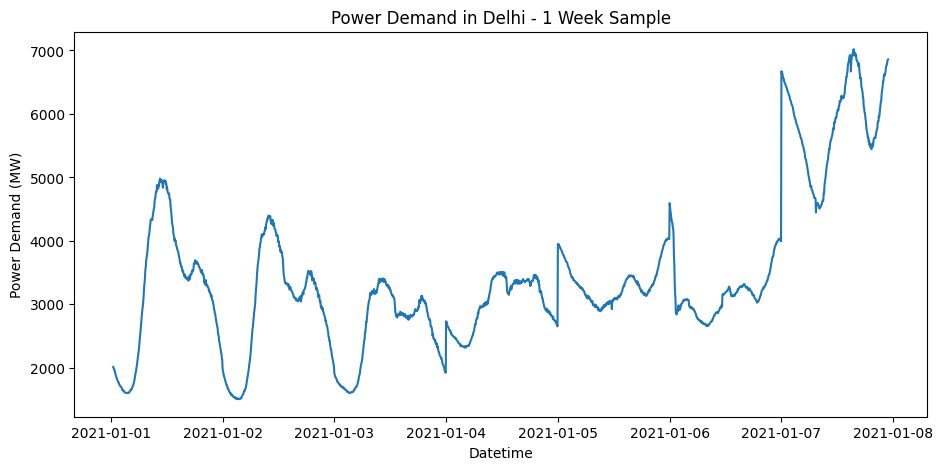

In [82]:
# Sample Weekly Consumption
sample = df["y"]["2021-01-01":"2021-01-07"]

plt.figure(figsize=(11,5))
plt.plot(sample)
plt.title("Power Demand in Delhi - 1 Week Sample")
plt.xlabel("Datetime")
plt.ylabel("Power Demand (MW)")
plt.show()
# sample

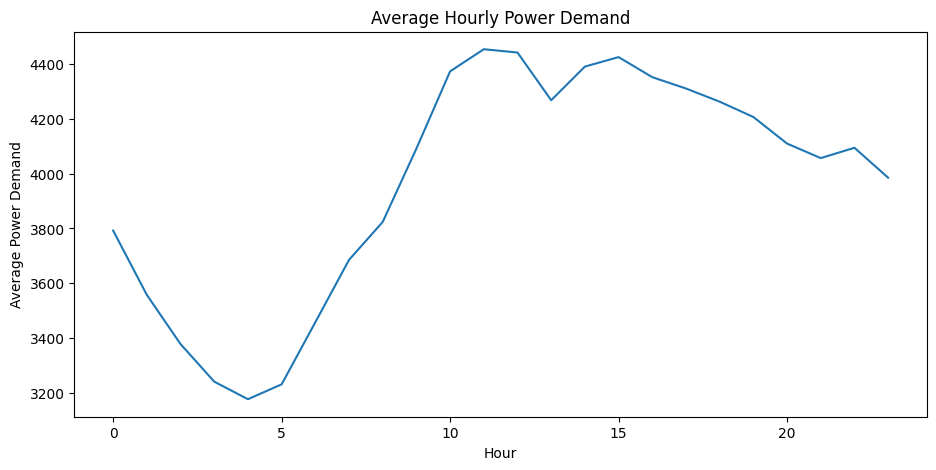

In [101]:
# Average Hourly Curve
df["hour"] = df.index.hour      # Means df.ds.hour
avg_day = df.groupby("hour")["y"].mean()     # Simply doing df["hour"].mean() will not give us mean of Power Consumption.
# avg_day
plt.figure(figsize=(11,5))
sns.lineplot(x=avg_day.index, y=avg_day.values)
plt.title("Average Hourly Power Demand")
plt.xlabel("Hour")
plt.ylabel("Average Power Demand")
plt.show()

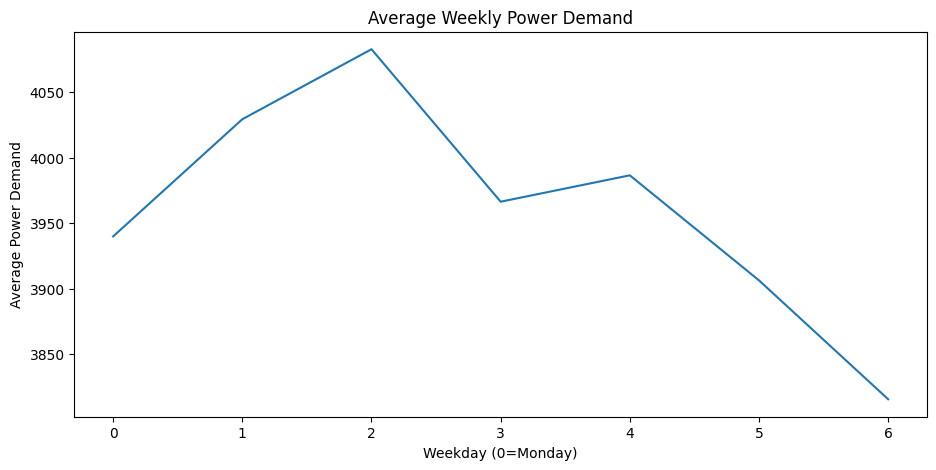

In [104]:
# Average Demand Weekly Demand
df["week"] = df.index.weekday
avg_week = df.groupby("week")["y"].mean()
# avg_week
plt.figure(figsize=(11,5))
sns.lineplot(x=avg_week.index, y=avg_week.values)
plt.title("Average Weekly Power Demand")
plt.xlabel("Weekday (0=Monday)")
plt.ylabel("Average Power Demand")
plt.show()

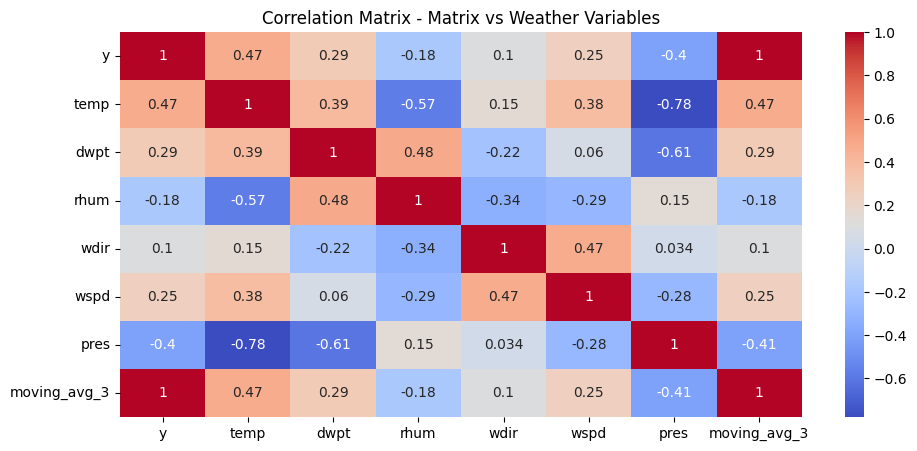

In [109]:
# Correlation Heatmap
plt.figure(figsize=(11,5))
sns.heatmap(df[["y","temp","dwpt","rhum","wdir","wspd","pres","moving_avg_3"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix - Matrix vs Weather Variables")
plt.show()

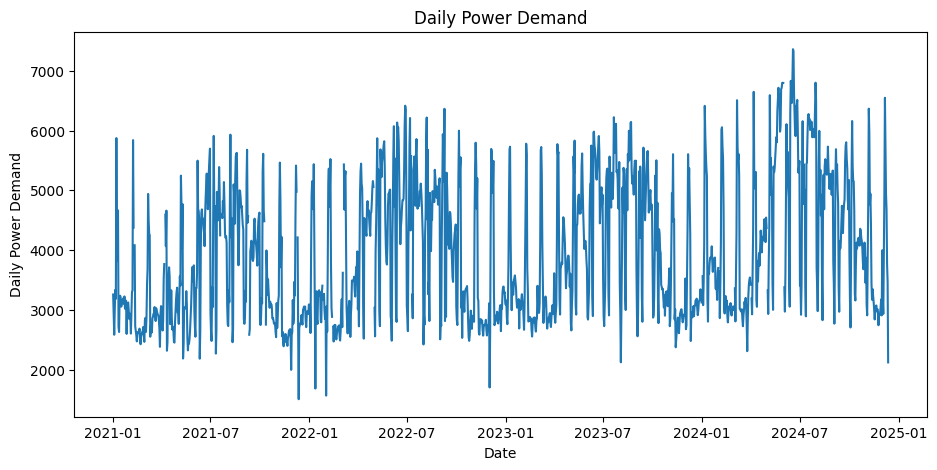

In [110]:
# Daily Average Demand
daily = df["y"].resample("D").mean()
plt.figure(figsize=(11,5))
plt.plot(daily.index, daily.values)
plt.title("Daily Power Demand")
plt.xlabel("Date")
plt.ylabel("Daily Power Demand")
plt.show()

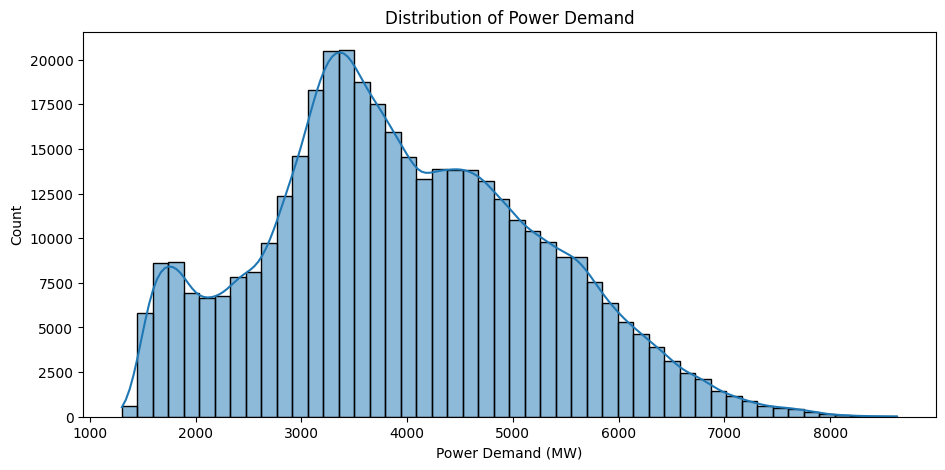

In [111]:
# Distribution of Demand
plt.figure(figsize=(11,5))
sns.histplot(df["y"], kde=True, bins=50)
plt.title("Distribution of Power Demand")
plt.xlabel("Power Demand (MW)")
plt.show()

In [118]:
df_clean = df.copy()
df_clean.to_csv("../results/Delhi_Cleaned.csv")
print("Cleaned data saved as Delhi_Cleaned.csv")

Cleaned data saved as Delhi_Cleaned.csv
